# Titanic project
### 参考
1.[kaggle](https://www.kaggle.com/c/titanic/data)  
2.[seaborn](https://seaborn.pydata.org/)  
3.[git](https://git-scm.com/book/zh/v2)  
4.[matplotlib](https://matplotlib.org/)  
5.[Free Statistics Calculators](http://www.danielsoper.com/statcalc/calculator.aspx?id=10)

### 1.项目总览
数据集包含了泰坦尼克号于1912年4月15沉没时891名乘客的样本，其中所知信息有：  
*    乘客ID
*    是否存活  
*    船舱等级  
*    姓名  
*    性别  
*    年龄  
*    兄弟姐妹、配偶（差不多岁数）数量  
*    父母、子女（上下各一个辈分）数量  
*    船费  
*    船舱号  
*    登船港口

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [8]:
df = pd.read_csv('/Users/user/Desktop/titanic-data.csv')

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2.数据清理

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


查看数据集时，发现年龄与船舱列有NaN值，由于Cabin列缺失数据过多，无法进行分析，所以暂时不处理，这里使用dropna进行筛选

In [11]:
new_df = df.dropna(subset=['Age'])
new_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


### 3.项目数据问题  
**3.1 乘客相关单变量**：  

1.    乘客年龄分布
2.    乘客性别分布

**3.2 乘客相关多变量**：

1.    乘客性别与是否生存的关系
2.    乘客所在船舱与是否生存的关系

### 4.探索数据
**4.1 乘客年龄分布**：

In [13]:
bins = np.arange(0, 90, 10)
new_df['Age_group'] = pd.cut(new_df['Age'], bins)
new_df.groupby(new_df['Age_group'])['PassengerId'].count()

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

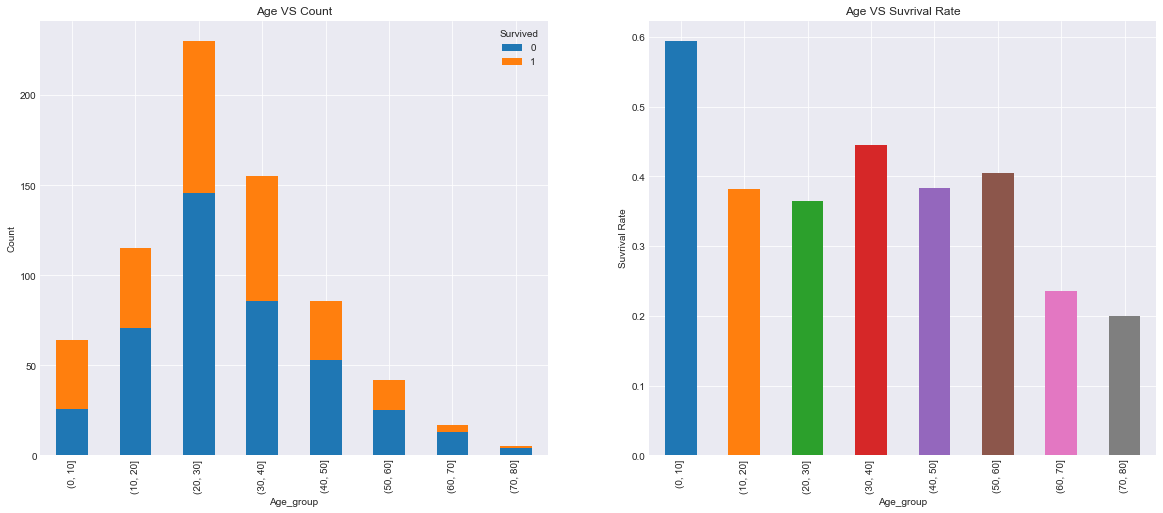

In [14]:
plt.figure(figsize=(12,5))
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches((20, 8))
new_df.groupby(['Age_group', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar',ax=ax1, stacked=True)
ax1.set_title('Age VS Count')
ax1.set_ylabel('Count')
new_df.groupby(['Age_group'])['Survived'].mean().plot(kind='bar',ax=ax2)
ax2.set_title('Age VS Suvrival Rate')
ax2.set_ylabel('Suvrival Rate')
plt.show()

根据图片可以看出，大部分乘客年龄集中在10岁及40岁之间，再看生存率一栏，10岁以下生存率最高

**4.2 乘客性别分布**

In [15]:
sex_df = new_df[['Survived', 'Sex']].groupby('Sex').count().unstack()
sex_df

          Sex   
Survived  female    261
          male      453
dtype: int64

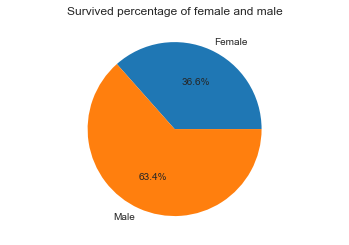

In [16]:
labels = ['Female', 'Male']
plt.axis('equal')
plt.pie(sex_df, labels=labels, autopct='%1.1f%%')
plt.title(u'Survived percentage of female and male')
plt.show()

男性乘客人数大大多于女性乘客人数，比例约为2：1

**4.3 男女生存比例**：

In [17]:
sex_cross_df = pd.crosstab(new_df['Sex'], new_df['Survived']) #形成性别与生存的交叉表
sex_cross_df.unstack()

Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
dtype: int64

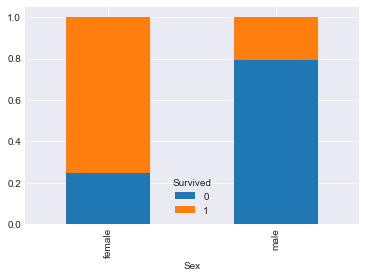

In [18]:
sex_cross_df.div(sex_cross_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

虽然男性乘客人数大大多于女性乘客人数，但是女性幸存率却远高于男性，再根据之前年龄幸存比例图，推断出灾难发生时，采用了妇孺先行的准则

**4.1 船舱与生存比例**

In [20]:
pclass_df = pd.crosstab(new_df['Pclass'], new_df['Survived'])
print(pclass_df)

Survived    0    1
Pclass            
1          64  122
2          90   83
3         270   85


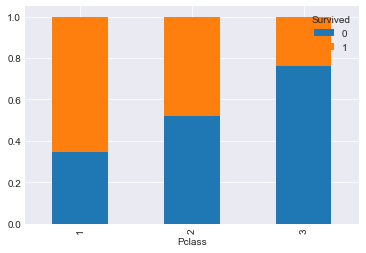

In [21]:
pclass_df.div(pclass_df.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

一等舱生存率大于二等舱，二等舱大于三等舱，可能是由于一等舱所处的位置离救生船较近，具体原因不明，数据集中为未表明

### 统计学推论

In [23]:
def df_summary(df, columnname):
    print('乘客平均生还率如下:\n%r'% (df['Survived'].groupby(df[columnname]).mean()))
    print('乘客总人数如下:\n%r'% (df['Survived'].groupby(df[columnname]).count()))
    print('乘客生还率标准偏差如下:\n%r'% (df['Survived'].groupby(df[columnname]).std()))
    print('乘客生还率方差如下:\n%r'% (df['Survived'].groupby(df[columnname]).var()))

In [24]:
df_summary(df, 'Sex')

乘客平均生还率如下:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
乘客总人数如下:
Sex
female    314
male      577
Name: Survived, dtype: int64
乘客生还率标准偏差如下:
Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64
乘客生还率方差如下:
Sex
female    0.192029
male      0.153488
Name: Survived, dtype: float64


零假设:女性生存率不比男性高 $$H_0:\mu_f\leq\mu_m$$ 备择假设:女性生存率高于男性 $$H_0:\mu_f&gt;\mu_m$$ 独立样本t检验，单尾正方向 $$\alpha=0.05,$$ 描述统计量： $$\overline{x}_f=0.74,n_f=314,df_f=313,SD_f=0.44,SS_f=0.19$$$$\overline{x}_m=0.19,n_m=577,df_m=576,SD_m=0.39,SS_m=0.15$$ 合并方差： $$S_{p}^2=\frac{SS_f+SS_m}{df_f+df_m}=0.00038
$$ 标准误差： $$SE=\sqrt{\frac{S_{p}^2}{n_f}+\frac{S_{p}^2}{n_m}}=0.0014$$ t统计值： $$t_statistic=\frac{\overline{x}_f-\overline{x}_m}{SE}=392.86$$ 根据计算器计算t临界值: $$t_{critical}=1.647$$ 因此t统计值远大于t临界值，所以拒绝零假设，女性生还率显著高于男性

### 结论说明

1.此份数据为总体的一部分样本，不能代表所有船员，推论有一定偏差  
2.部分数据缺失，导致部分统计结论误差加大  
3.本次调查属于观察性研究，不是实验研究